# INTRODUCTION

Ce notebook se concentre sur un problème de prédiction des prix de maisons, tirant parti d'un ensemble de données provenant de Kaggle. Notre objectif est de développer des modèles de prédiction précis pour estimer les prix des maisons en fonction de diverses caractéristiques.

Pour aborder ce problème, nous utiliserons deux types d'algorithmes : ceux basés sur les arbres de décision et ceux basés sur des modèles linéaires. Cette approche nous permettra d'explorer et de comparer les performances de ces deux types de modèles dans la prédiction des prix immobiliers.

Ce projet est idéal pour les débutants, car il offre une expérience complète de travail sur les données, y compris le nettoyage, la transformation, la modélisation et l'évaluation des modèles. Cela nous permettra de mieux comprendre les différentes étapes impliquées dans la résolution d'un problème de régression et d'approfondir nos connaissances en science des données.

N'attendons pas plus, et plongeons dans ce problème !

# SOMMAIRE

1. Importation des librairies
2. Chargement des donnes
3. Vue d'ensemble des données
4. Nettoyage des données
5. Sélection des variables les plus importantes
6. Exploration des données   
    Analyse univariée   
    Analyse bivariée  
7. Transformation des donnes pour les arbres        
    Traitement des variables corrélées    
    Traitement des variables insignifiantes        
8. Modélisation basée sur les arbres     
    Évaluation des modèles    
    Prédiction     
9. Transformation des données pour les modèles linéaires     
    Traitement des outliers      
    Traitement de la distribution des valeurs      
    Standardisation     
10. Modélisation linéaire   
    Évaluation des modèles      
    Prédiction   
11. Modélisation finale
12. Conclusion
13. Pour aller plus loin


# 1. Importation des librairies

> Nous importons les librairies dont nous avons besoin pour notre étude.  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 2. Chargement des donnes

> Nous récupérons les données du dataset et les stockons dans des dataFrame.

In [2]:
path = '/kaggle/input/house-prices-advanced-regression-techniques/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

> Nous séparons la variable cible des variables prédictives.

In [3]:
target = train.SalePrice
train.drop('SalePrice', axis=1, inplace=True)

> Nous récupérons les identifiants des différentes observations du dataset.

In [4]:
train_id = train.Id
train.drop('Id', axis=1, inplace=True)

test_id = test.Id
test.drop('Id', axis=1, inplace=True)

> Nous réunissons l'ensemble des données pour en faciliter l'analyse et le traitement.

In [5]:
data = pd.concat((train, test))

# 3. Vue d'ensemble des données

> Nous jetons un premier coup d'œil à notre jeu de données pour en obtenir une première compréhension.

In [6]:
data.shape

(2919, 79)

> Le jeu de données comporte un grand nombre de variables.  
> Un soin particulier devra être apporté au traitement de celles-ci.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

> Le jeu de données comprend à la fois des variables numériques et catégorielles.  
> Certaines variables semblent contenir un grand nombre de valeurs manquantes.

In [8]:
# on étudie les variables catégorielles
data.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [9]:
# on étudie les variables numériques
data.describe(exclude='object')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# 4. Nettoyage des données

> Commençons par nettoyer les données en traitant les valeurs manquantes et les doublons.

***gestion des valeurs manquantes***

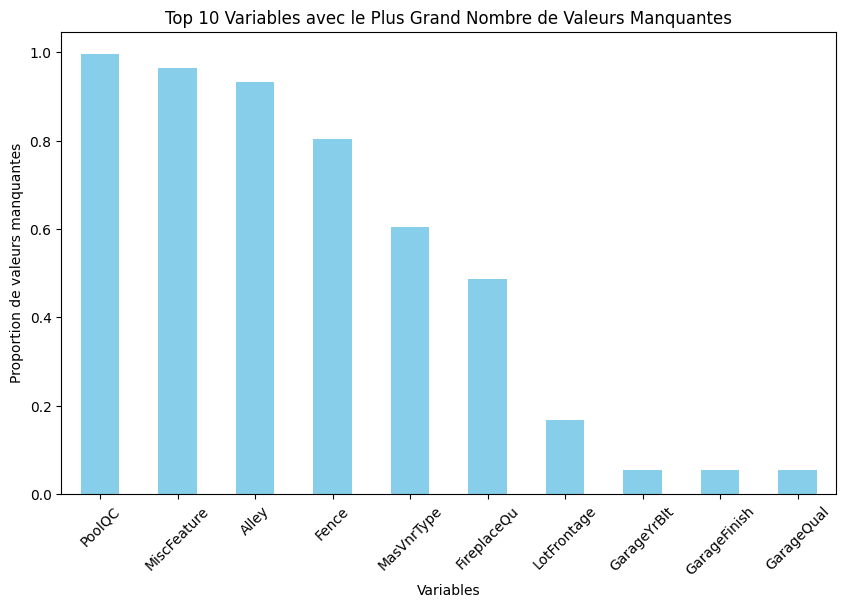

In [10]:
# Nous identifions les variables possédant la plus grande part de valeurs manquantes
missing_values = (data.isnull().sum() / len(data)).sort_values(ascending=False).head(10)

# Créer un diagramme à barres
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Top 10 Variables avec le Plus Grand Nombre de Valeurs Manquantes')
plt.xlabel('Variables')
plt.ylabel('Proportion de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()

> Nous supprimons les variables avec une trop grande part de valeur manquantes.  
> Cela permet d'augmenter la stabilité du modèle et de diminuer la dimensionnalité du dataset.

In [11]:
data.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu"], axis=1, inplace=True)

> Nous traitons les valeurs manquantes des variables restantes en les remplaçant par la médiane pour les variables numériques et par la mode pour les variables catégoriques.

In [12]:
for col in data.select_dtypes(include="object").columns:
  data[col].fillna(data[col].mode()[0], inplace=True)

for col in data.select_dtypes(exclude="object").columns:
  data[col].fillna(data[col].median(), inplace=True)

# 5. Sélection des variables les plus importantes

> Nous disposons désormais de données nettoyées.   
> Nous pouvons maintenant procéder à une analyse plus approfondie pour identifier les traitements nécessaires.

> Notre dataset contient un grand nombre de variables.   
> Pour simplifier notre étude, nous allons nous concentrer sur les variables ayant le plus d'influence sur la variable cible

***identification des variables les plus importantes***

> Pour identifier les variables les plus importantes, nous pouvons entraîner une forêt aléatoire et utiliser la fonction 'feature_importances_'. 
> Nous définissons alors une fonction identifiant ces variables dans un jeu de données, ce qui nous permettra de la réutiliser ultérieurement.

In [13]:
def importance(train, target):
    train_temp = train.copy()
    
    label_encoder = LabelEncoder()

    for col in train_temp.select_dtypes(include="object").columns:
      train_temp[col] = label_encoder.fit_transform(train_temp[col]).astype(int)

    model = RandomForestRegressor(random_state=0)
    model.fit(train_temp, target)
    feature_importance = model.feature_importances_

    feature_importance_df = pd.DataFrame({'feature': train_temp.columns, 'importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    
    return feature_importance_df

> Nous pouvons désormais identifier les variables les plus importantes.

In [14]:
# nous récupérons nos données d'entraînement.
train = data[:train.shape[0]]

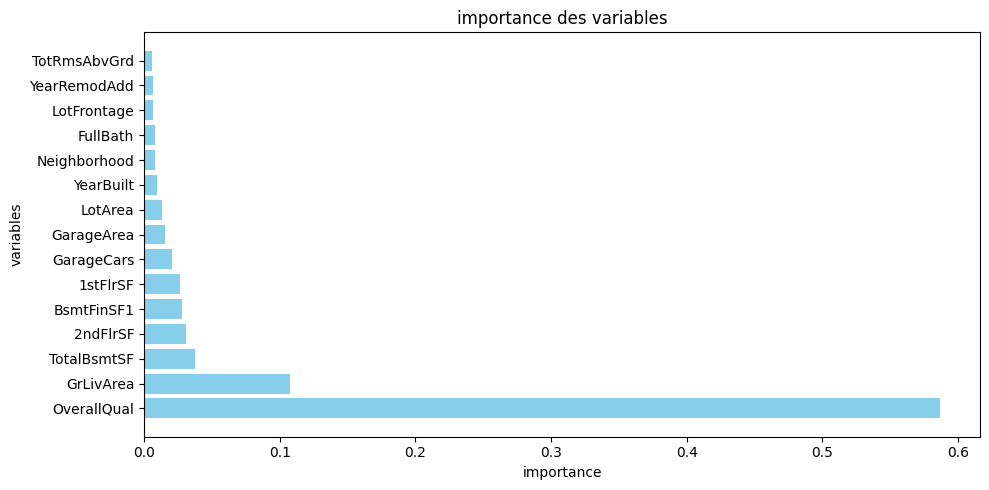

In [15]:
# nous appelons notre fonction et stockons les résultats dans une dataframe
feature_importance_df = importance(train, target)

# nombre de variables à afficher
nb_features = 15
plt.figure(figsize=(10, 5))

# nous affichons les variables
plt.barh(feature_importance_df['feature'].head(nb_features), feature_importance_df['importance'].head(nb_features), color='skyblue')
plt.xlabel('importance')
plt.ylabel('variables')
plt.title('importance des variables')

plt.tight_layout()
plt.show()

In [16]:
top_features = feature_importance_df['feature'].tolist()

numeric_top_features = [col for col in top_features if data[col].dtype in ['int64', 'float64']]
categorical_top_features = [col for col in top_features if data[col].dtype == 'object']

> L'identification des données les plus importantes nous permettra de concentrer nos efforts sur les éléments ayant le plus d'influence sur la variable cible.

# 6. Exploration des données 

> Maintenant que nos données ont été nettoyées, nous pouvons les explorer pour en obtenir une meilleure compréhension.

***Analyses univariées***

> Nous examinons ici la distribution et la dispersion des données pour détecter d'éventuelles anomalies nécessitant un traitement ultérieur.

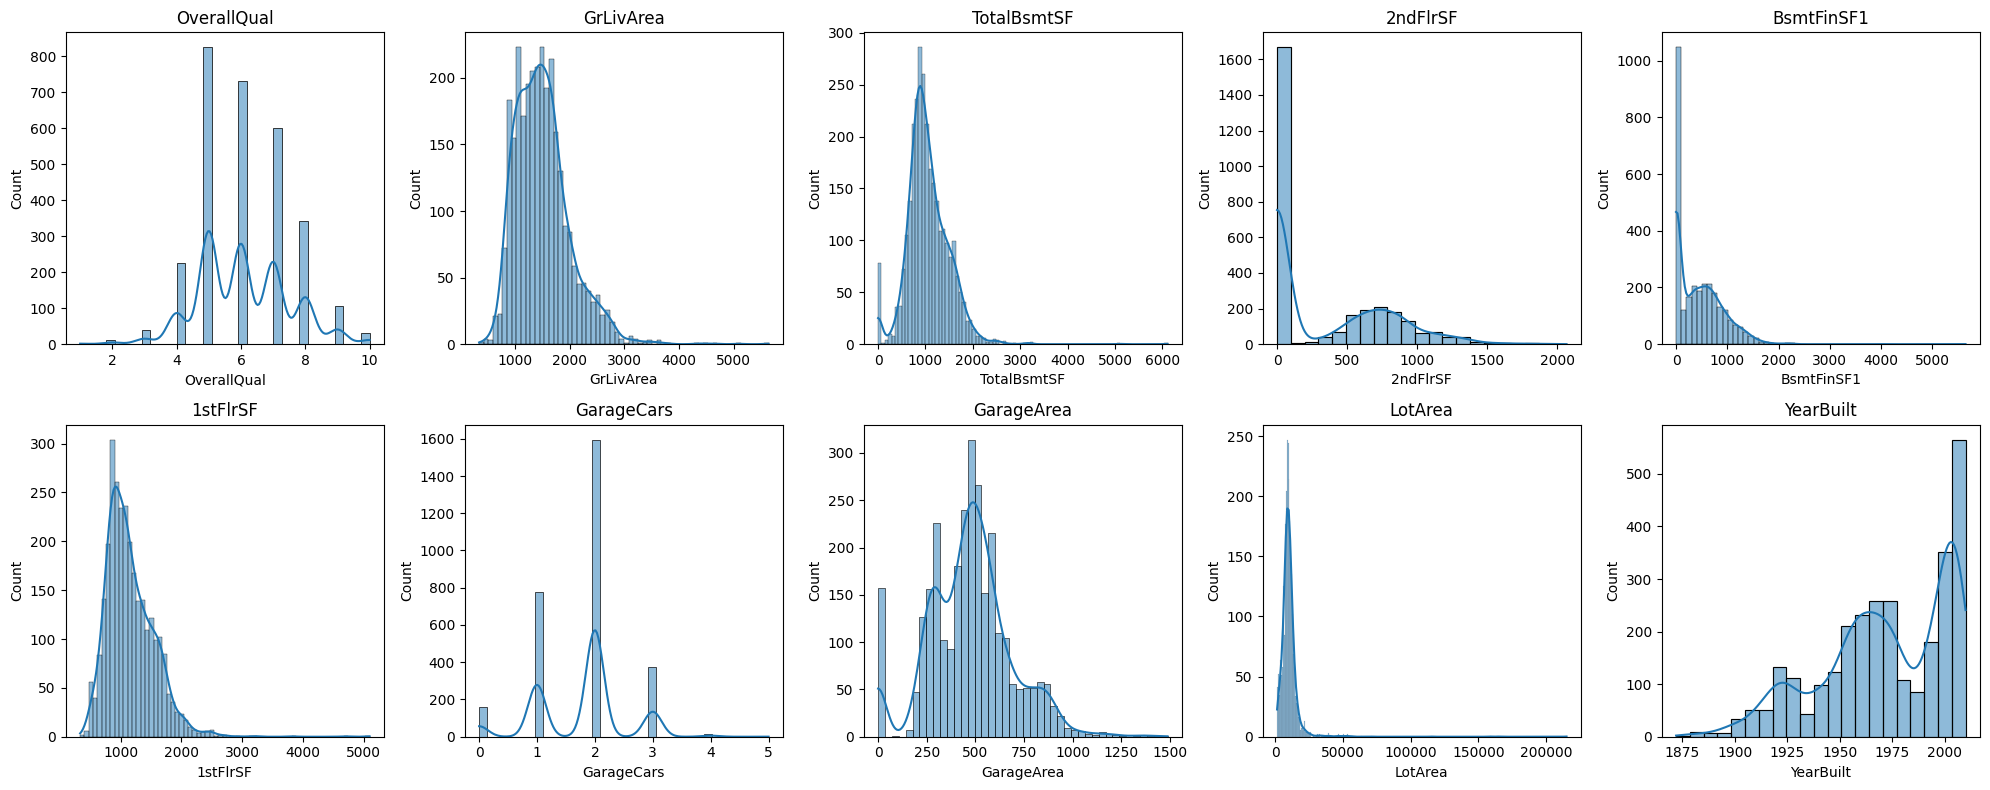

In [17]:
numeric = numeric_top_features[:10]

num_cols = len(numeric)
num_rows = num_cols // 5 + (num_cols % 5 > 0)

fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))

for i, col in enumerate(numeric):
    sns.histplot(data[col], kde=True, ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(col)

if num_cols % 5 != 0:
    for j in range(num_cols % 5, 5):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

> Certaines variables présentent une asymétrie avec une queue de distribution étendue vers la droite.  
> Des transformations seront nécessaires pour des variables telles que GrLivArea ou 1stFlrSF afin de les rendre plus proches d'une distribution normale.  
> Certaines variables semblent également présenter des valeurs aberrantes qui devront être traitées.

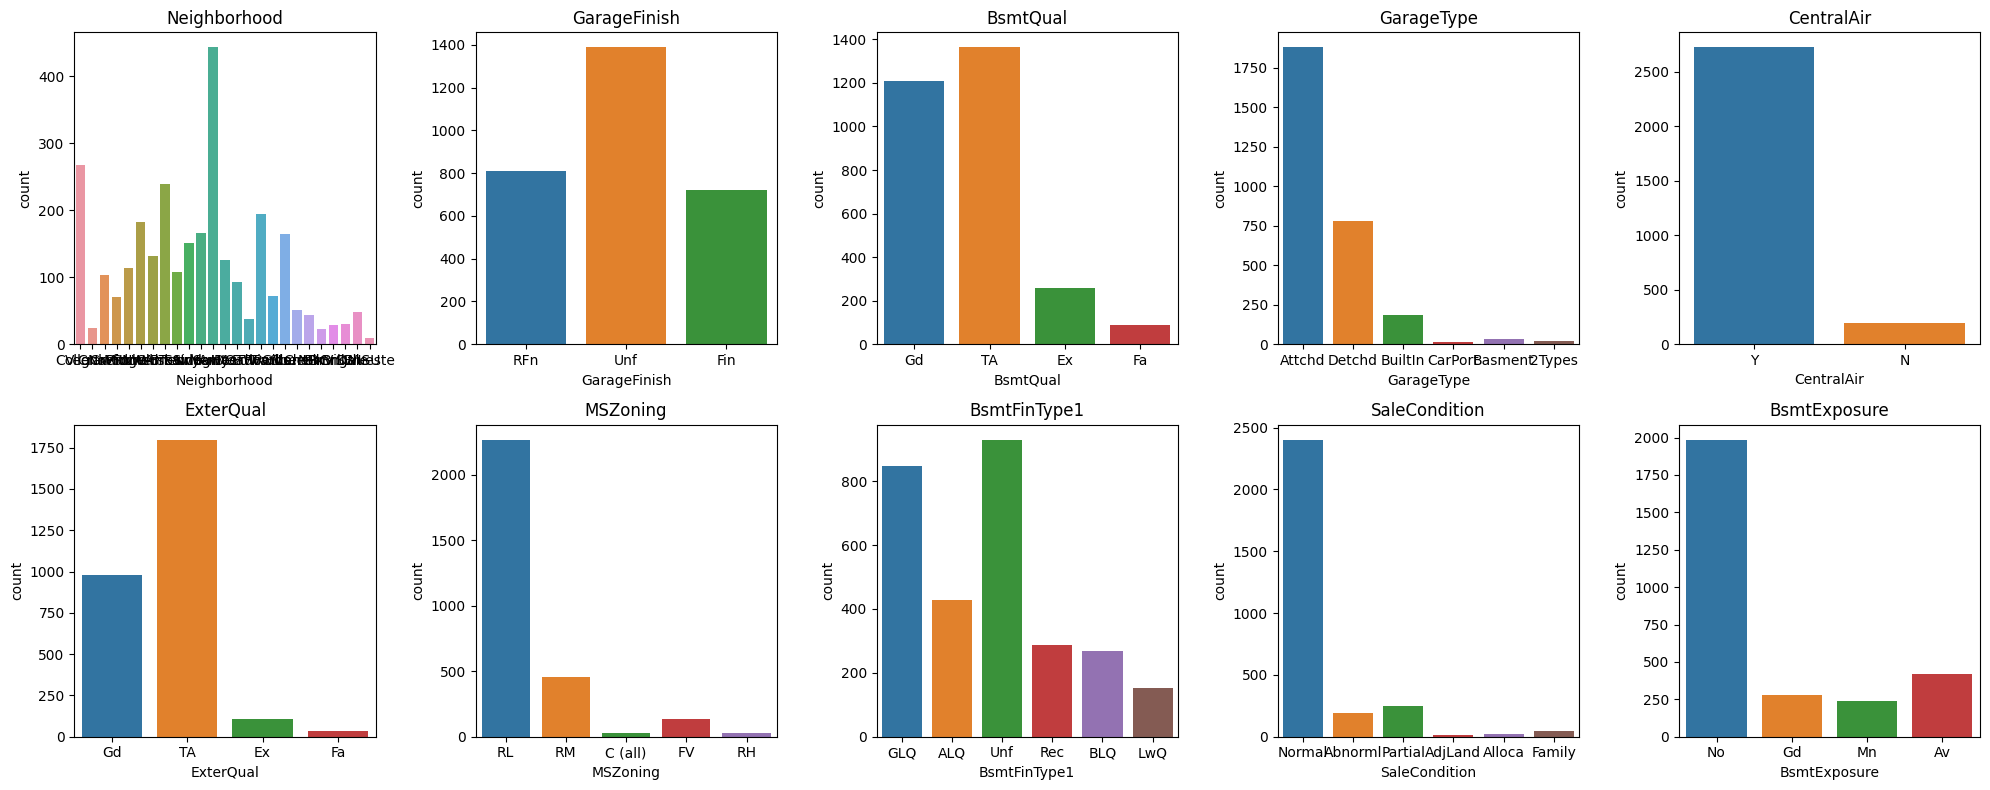

In [18]:
categoric = categorical_top_features[:10]

num_cols = len(categoric)
num_rows = num_cols // 5 + (num_cols % 5 > 0)

fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))

for i, col in enumerate(categoric):
    sns.countplot(x=data[col], ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(col)

if num_cols % 5 != 0:
    for j in range(num_cols % 5, 5):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

> Nous remarquons une grande hétérogénéité au sein des variables catégorielles.   
> Cela implique une stabilité plus faible du modèle, nous pourrons opter pour des modèles avec régularisation.  
> Nous pourrons également regrouper les valeurs minoritaires pour diminuer le bruit.

***Analyses bivariées***

> Nous étudions les relations qui existent entre les différentes variables afin d'identifier les associations significatives qui pourraient influencer notre analyse.   
> Nous étudierons ici la corrélation des variables afin de détecter des tendances communes et de mesurer leur intensité.

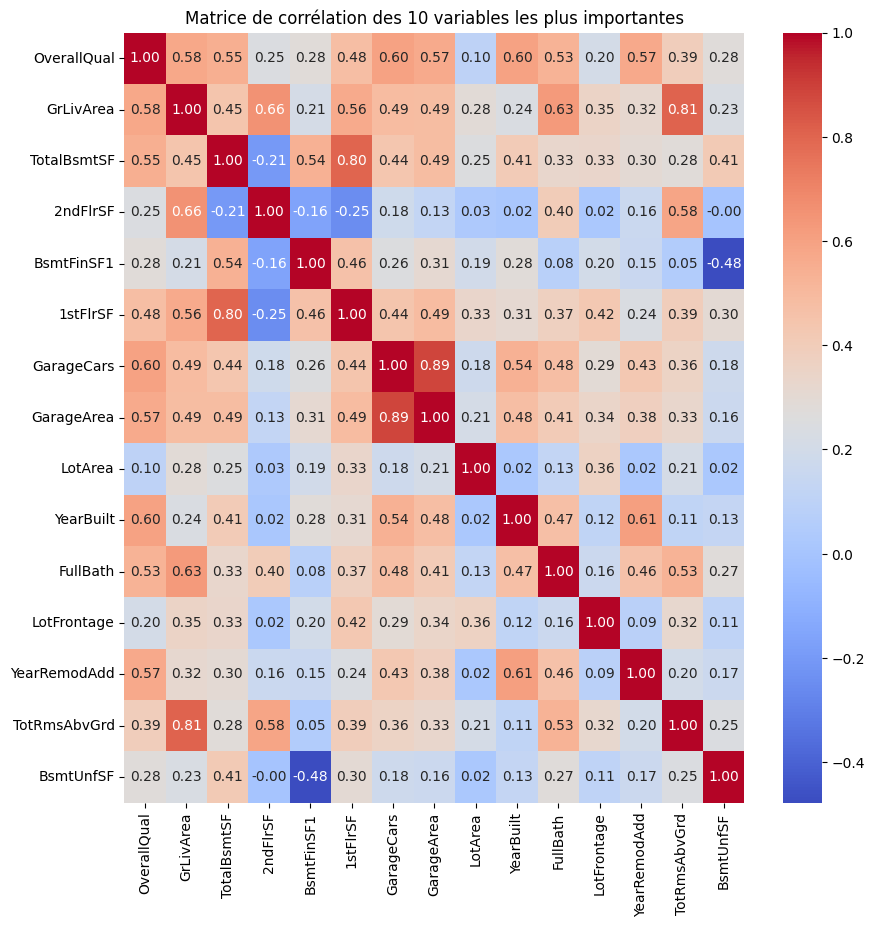

In [19]:
df_top_features = data[numeric_top_features[:15]]

correlation_matrix = df_top_features.corr()

# Affichage de la matrice de corrélation à l'aide de seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des 10 variables les plus importantes')
plt.show()

> Nous identifions trois paires de variables hautement corrélées :
> - GarageArea et GarageCars
> - GrLivArea et TotRmsAbvGrd
> - 1stFlrSF et TotalBsmtSF

> Ces cas devront être traité afin d'éviter la redondance d'information et la surdétermination.

# Transformation des donnes

> Maintenant que nous avons acquis une solide connaissance et compréhension de nos données, nous sommes prêts à appliquer les transformations nécessaires pour les préparer à l'analyse.

> Dans notre approche de modélisation, nous avons choisi d'utiliser deux types de modèles : des arbres de décision et des modèles linéaires.   
> Ces deux types de modèles nécessitent des traitements différents au niveau des données en raison de leurs caractéristiques intrinsèques.

# 7. Transformation des donnes pour les arbres

***traitement des variables hautement corrélées***

> Le traitement des variables corrélées est important pour améliorer la performance et la stabilité des modèles.   
> Nous avons plusieurs options pour gérer ces cas, notamment en supprimant l'une des deux variables ou en créant une nouvelle variable basée sur les deux.   
> L'importance de chaque variable va dicter quel est la meilleure action à entreprendre. 

> GarageArea et GarageCars sont fortement corrélés, mais sont toutes les deux importantes.  
> Nous souhaitons capturer l'ensemble de leurs informations en une seule variable.

In [20]:
data['garageIndicator'] = data.GarageArea + data.GarageCars
data.drop('GarageCars', axis=1, inplace=True)
data.drop('GarageArea', axis=1, inplace=True)

> L'importance de la variable TotRmsAbvGrd est négligeable comparé à celle de GrLivArea.   
> Nous pouvons ainsi supprimer la variable TotRmsAbvGrd du dataset.

In [21]:
data.drop('TotRmsAbvGrd', axis=1, inplace=True)

> 1stFlrSF et TotalBsmtSF sont également deux variables importantes de notre dataset.    
> Nous les traitons de la même façon que GarageArea et GarageCars.

In [22]:
data['FlrSF'] = (data["1stFlrSF"] + data.TotalBsmtSF) / 2
data.drop("1stFlrSF", axis=1, inplace=True)
data.drop('TotalBsmtSF', axis=1, inplace=True)

***traitement des variables insignifiantes***

> Après avoir identifié les variables les moins importantes, nous les supprimons pour simplifier notre modèle et augmenter sa stabilité.   
> Cette étape de nettoyage permet de concentrer notre analyse sur les variables les plus pertinentes.

> Ici, nous supprimons un certain pourcentage des variables les moins importantes.  
> Nous pouvons nous permettre de procéder ainsi au vu du nombre important de variables contenu dans notre dataset.

In [23]:
percent_to_remove = 0.1
num_features_to_remove = int(len(feature_importance_df) * percent_to_remove)

features_to_remove = feature_importance_df.tail(num_features_to_remove)
data.drop(features_to_remove.feature.tolist(), axis=1, inplace=True)

> Nous disposons désormais d'un ensemble de données propre et épuré, prêt à être utilisé pour la modélisation basée sur les arbres.

In [24]:
# nous copions le dataset
data_copy = data.copy()

# 8. Modélisation basée sur les arbres  

> Nous encodons les variables catégoriques, essentielle pour transformer les variables catégoriques en un format adapté à l'analyse et à la modélisation.

In [25]:
data = pd.get_dummies(data)

> Nous récupérons les données nécessaires pour la modélisation.

In [26]:
train = data[:train.shape[0]]
test = data[train.shape[0]:]
y = target

***Évaluation des modèles***

> Nous comparons les performances des différents modèles en utilisant une validation croisée.  
> Cette méthode nous permet d'évaluer la performance de chaque modèle en utilisant des données d'entraînement et de test différentes à chaque itération, garantissant des résultats fiables.

In [27]:
!pip install catboost
from catboost import CatBoostRegressor

In [28]:
# les différents modèles évalués
models = [
    ('random forrest', RandomForestRegressor(random_state=0)),
    ('gradient boost', GradientBoostingRegressor(random_state=0)),
    ('ada boost', AdaBoostRegressor(random_state=0)),
    ('cat boost', CatBoostRegressor(verbose=False, random_state=0))
]

# le dictionnaire dans lequel nous stockons les résultats des différents modèles
scores_dict = {}

for name, model in models:
    # validation croisée
    scores = cross_val_score(model, train, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    scores_dict[name] = {
        'average RMSE': np.mean(rmse_scores),
        'average Variance': np.var(rmse_scores)
    }

> Nous affichons la performance des différents modèles afin de sélectionner celui qui offre les meilleurs résultats.

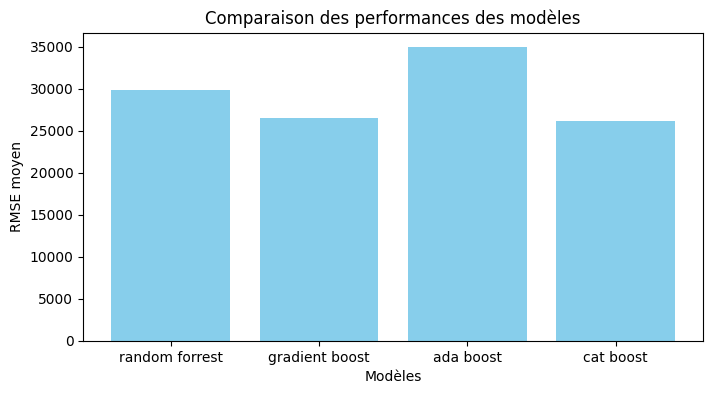

In [29]:
# Extraction des noms des modèles et des RMSE moyens
model_names = list(scores_dict.keys())
average_rmse = [scores_dict[name]['average RMSE'] for name in model_names]

# Création du graphique en barres
plt.figure(figsize=(8, 4))
plt.bar(model_names, average_rmse, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('RMSE moyen')
plt.title('Comparaison des performances des modèles')

plt.show()

***Prédiction***

> Le modèle de gradient boost présente les meilleures performances parmi les modèles évalués.   
> Nous retenons ce modèle pour prédire les données de test.

In [30]:
model_cat = CatBoostRegressor(verbose=False, random_state=0).fit(train, y)
cat_preds = model_cat.predict(test)

# 9. Transformation des données pour les modèles linéaires  

> Les modèles linéaires exigent un traitement supplémentaire pour s'adapter à leurs hypothèses, notamment des données normalement distribuées, standardisées et sans valeurs aberrantes.   
> Dans cette optique, nous allons appliquer différents traitements pour transformer nos données afin de répondre à ces critères essentiels, garantissant ainsi des résultats plus fiables et interprétables.

> Nous commençons par récupérer les données précédentes.

In [31]:
data = data_copy.copy()
train = data[:train.shape[0]]
test = data[train.shape[0]:]
y = target

> Ayant appliqué des modifications sur les différentes variables, nous refaisons appel à notre fonction permettant de déterminer les variables les plus importantes du dataset.

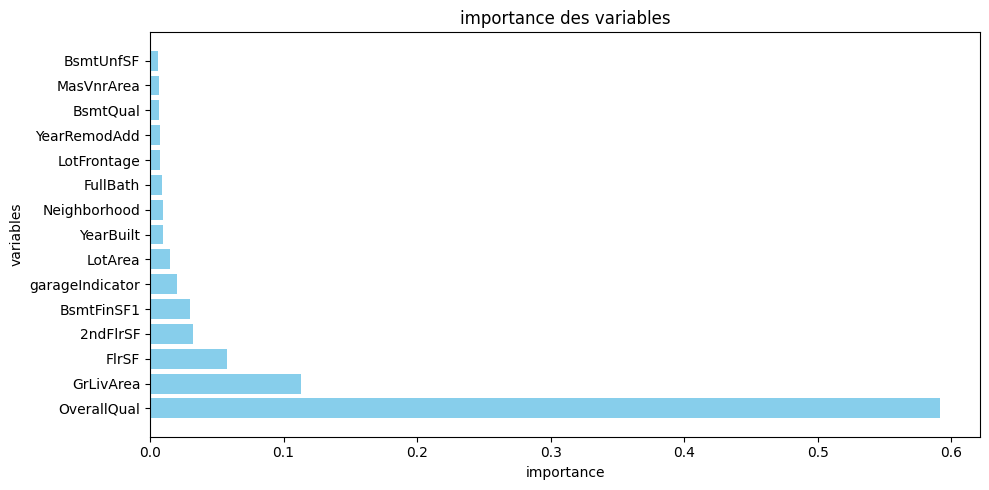

In [32]:
feature_importance_df = importance(train, target)

num_features = 15
plt.figure(figsize=(10, 5))

plt.barh(feature_importance_df['feature'].head(15), feature_importance_df['importance'].head(15), color='skyblue')

plt.xlabel('importance')
plt.ylabel('variables')
plt.title('importance des variables')

plt.tight_layout()
plt.show()

In [33]:
top_features = feature_importance_df['feature'].tolist()

numeric_top_features = [col for col in top_features if data[col].dtype in ['int64', 'float64']]
categorical_top_features = [col for col in top_features if data[col].dtype == 'object']

***Traitement des outliers***

> Nous identifions les valeurs aberrantes des variables de notre dataset avec des boxplot.  
> En éliminant ces outliers, nous améliorons la robustesse et la fiabilité de nos modèles.

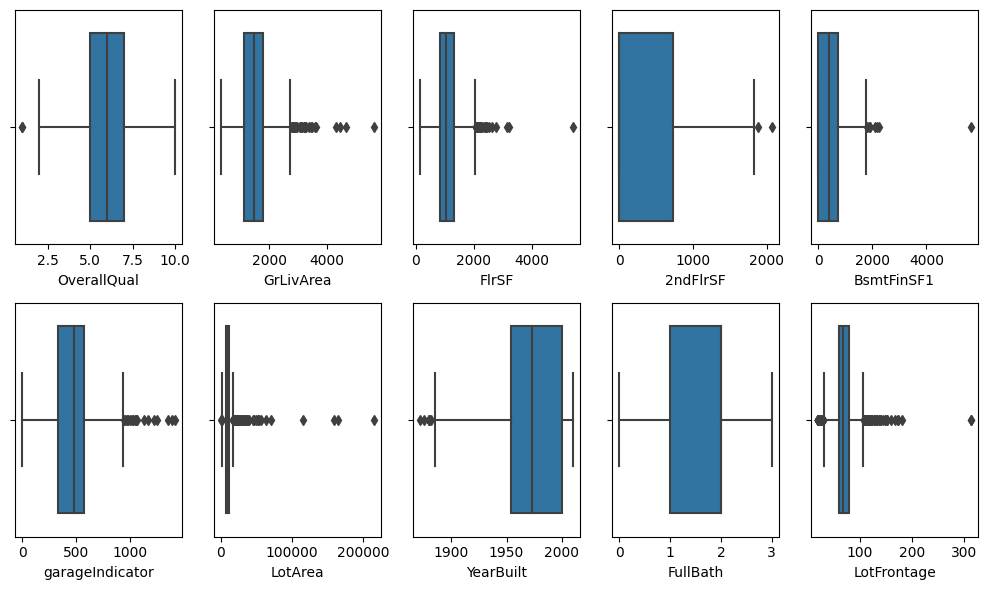

In [34]:
# nous n'analysons que les dix variables les plus importantes
numeric = numeric_top_features[:10]

num_cols = 5
num_rows = 2

fig, axes = plt.subplots(2, 5, figsize=(10, 2 * (num_rows + 1)))

for i, col in enumerate(numeric):
    sns.boxplot(x=train[col], ax=axes[i // 5, i % 5])

plt.tight_layout()
plt.show()

> Ces graphiques nous permettent de détecter visuellement les valeurs aberrantes pour chaque variable.  
> Nous stockons les index de ces observations dans une liste, avant de les supprimer de nos données d'entraînement.

In [35]:
index_list = []

index_list.extend(train[train.GrLivArea > 4000].index)
index_list.extend(train[train.FlrSF > 4000].index)
index_list.extend(train[train.BsmtFinSF1 > 4000].index)
index_list.extend(train[train.LotArea > 100000].index)
index_list.extend(train[train.LotFrontage > 200].index)

train.drop(index_list, inplace=True)
y.drop(index_list, inplace=True)

> Nous mettons à jour notre dataset avec ces données nouvellement traitées.

In [36]:
data = pd.concat((train, test))

***Traitement de la distribution des valeurs***

> Nous analysons maintenant la distribution des variables de notre dataset.  
> Cette étape est cruciale pour les modèles linéaires, car ces derniers supposent une distribution normale des variables.  
> Nous détectons les distributions asymétriques et appliquerons des transformations pour améliorer la conformité avec les hypothèses de normalité.


*variable cible*

> Commençons par étudier la distribution de la variable cible.

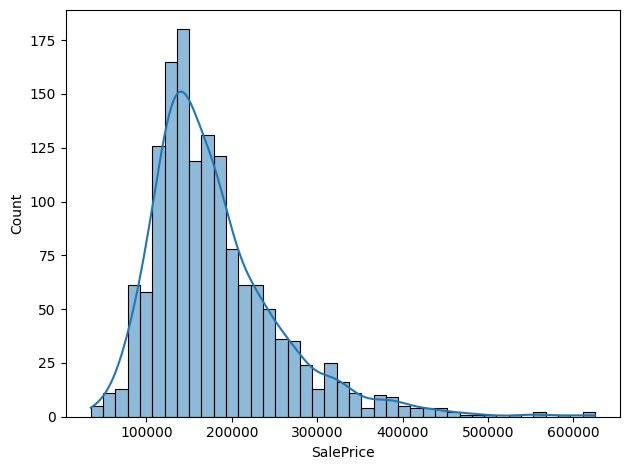

In [37]:
sns.histplot(target, kde=True)

plt.tight_layout()
plt.show()

> Nous observons une asymétrie avec une queue droite allongée.   
> Une transformation logarithmique est adaptée dans ce cas-là.

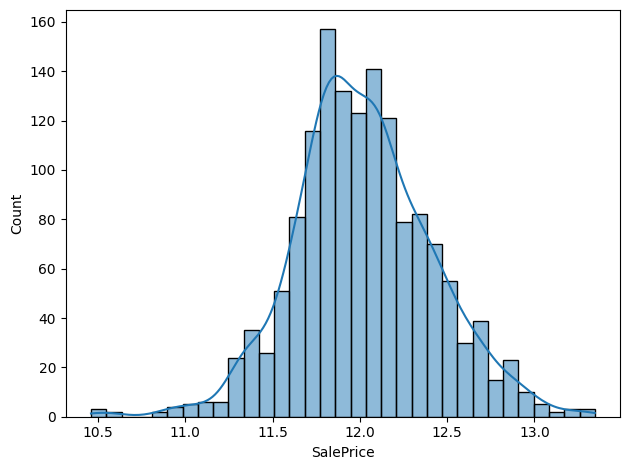

In [38]:
sns.histplot(np.log1p(target), kde=True)

plt.tight_layout()
plt.show()

> La transformation logarithmique rend la distribution de la variable beaucoup plus normale.  
> Nous l'appliquons donc à notre variable cible.

In [39]:
target = np.log1p(target)

*variables prédictives*

> Nous effectuons un travail similaire sur les variables prédictives.   
> Commençons par étudier leurs distributions afin d'identifier celles qui nécessitent une transformation.

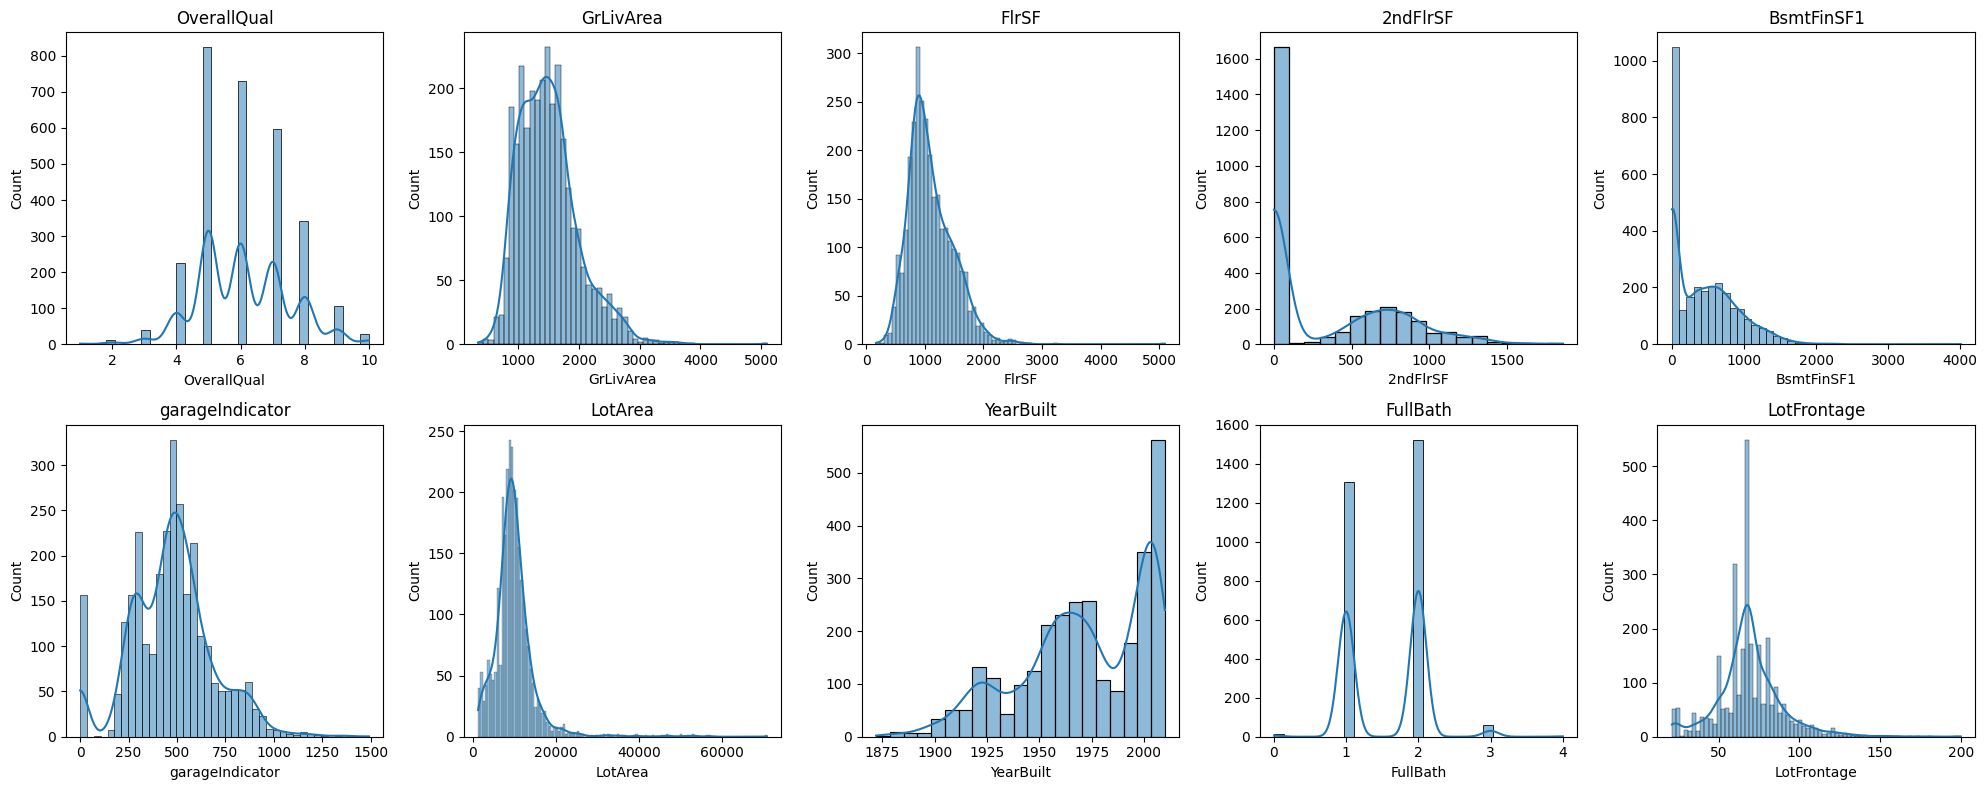

In [40]:
numeric = numeric_top_features[:10]

num_cols = len(numeric)
num_rows = num_cols // 5 + (num_cols % 5 > 0)

fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))

for i, col in enumerate(numeric):
    sns.histplot(data[col], kde=True, ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(col)

if num_cols % 5 != 0:
    for j in range(num_cols % 5, 5):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

> Nous identifions 5 variables asymétriques : 'GrLivArea', 'FlrSF', 'LotArea', 'LotFrontage', 'BsmtFinSF1'.   
> Elles présentent toutes un allongement sur la partie droite de leur distribution.   
> La transformation logarithmique est également adaptée pour ces variables.

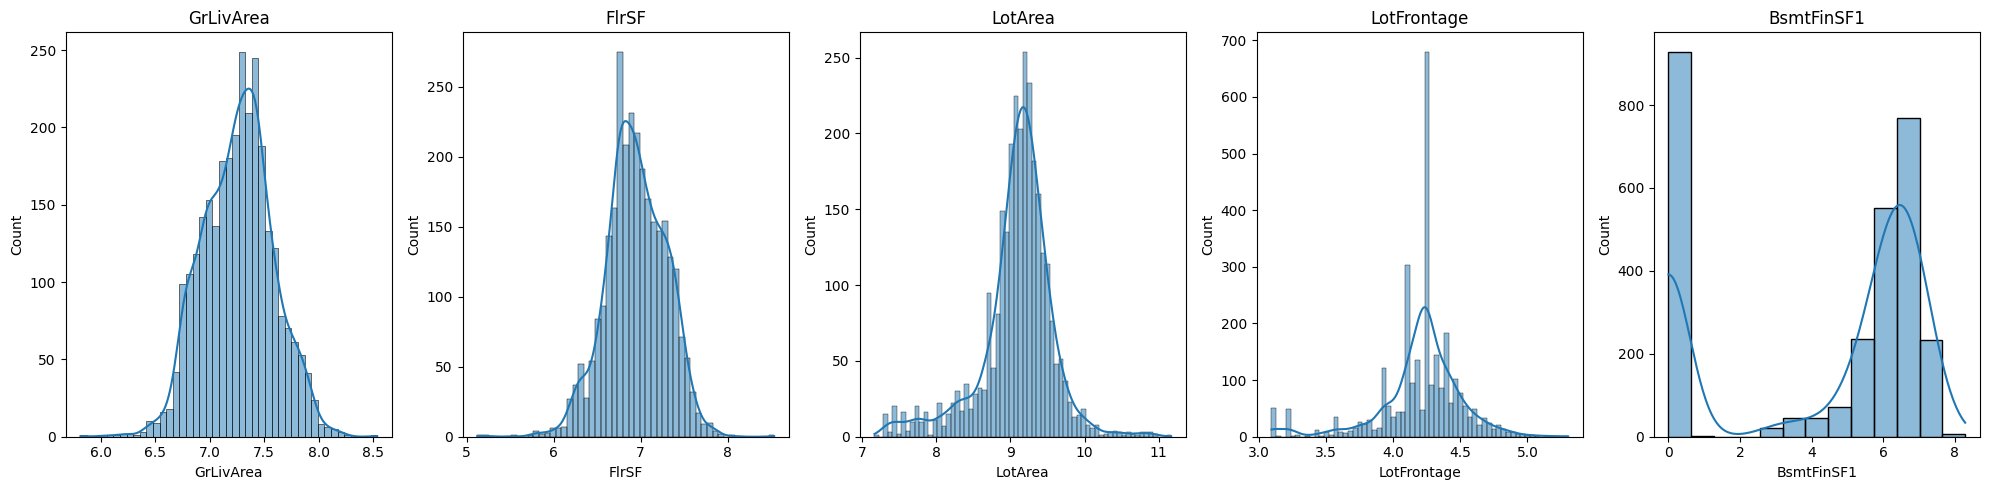

In [41]:
col = ['GrLivArea', 'FlrSF', 'LotArea', 'LotFrontage', 'BsmtFinSF1']
dvp = np.log1p(data[col])


fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, col in enumerate(col):
    sns.histplot(dvp[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()

> Ici aussi, la transformation logarithmique rend la distribution des variables plus normale.   
> Nous appliquons donc cette transformation à notre dataset.

In [42]:
data[col] = np.log1p(data[col])

> Nous avons désormais des données propre, épurée et équilibrée.  
> Nous pouvons utiliser des modèles linéaires.  

**STANDARDISATION DES DONNEES**

> La standardisation des données rescale chaque variable pour qu'elle ait une moyenne de zéro et un écart-type de un.   
> Cette étape est essentielle pour les modèles linéaires, car elle assure que toutes les variables contribuent de manière équitable.

*encodage des données*

> Nous encodons les variables catégorielles afin de les rendre compatibles avec les modèles linéaires.

In [43]:
data = pd.get_dummies(data)

*standardisation*

> Nous pouvons désormais appliquer la standardisation des données

In [44]:
# nous récupérons nos données d'entraînement et nos données de test 
train = data[:train.shape[0]]
test = data[train.shape[0]:]
y = target

> Nous ajustons le scaler sur les données d'entraînement, puis appliquons cette transformation aux données de test pour garantir une évaluation juste et sans biais.

In [45]:
scaler = StandardScaler()

# on traite les donnes séparement pour eviter les data leaks
train = scaler.fit_transform(train)
test = scaler.transform(test)

# 10. Modélisation linéaire   

> Nos données ont été soigneusement prétraitées : elles ont été normalisées, standardisées et débarrassées des outliers.   
> Elles sont maintenant prêtes à être utilisées pour construire notre modèle linéaire.

***Évaluation des modèles***

> Nous utilisons une validation croisée pour comparer les performances des différents modèles.   
> Notre choix se porte exclusivement sur des modèles avec régularisation, ce qui assure une meilleure stabilité, notamment pour les datasets comportant un grand nombre de variables.

In [46]:

models = [
    ('ridge', Ridge(random_state=0)),
    ('lasso', Lasso(random_state=0)),
    ('elastic', ElasticNet(random_state=0))
]

scores_dict = {}

# Validation croisée
for name, model in models:
    scores = cross_val_score(model, train, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    scores_dict[name] = {
        'average RMSE': np.mean(rmse_scores),
        'average Variance': np.var(rmse_scores)
    }

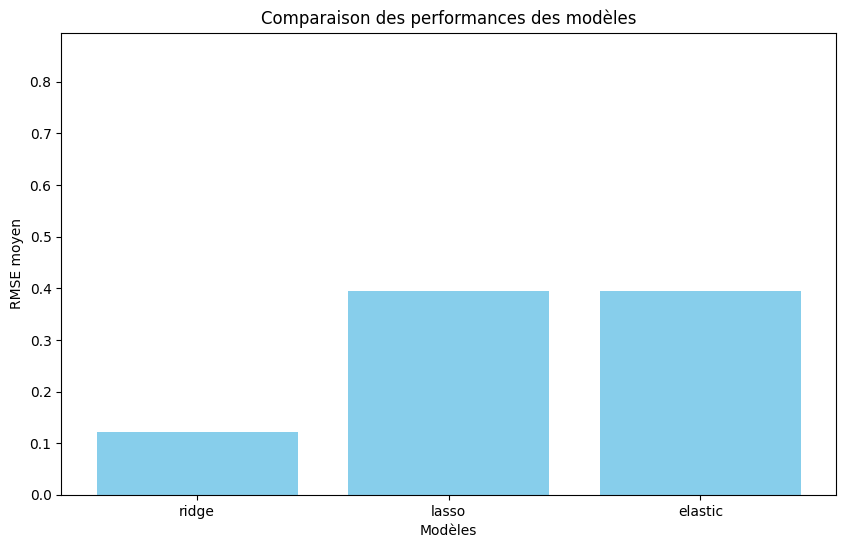

In [47]:
# Extraction des noms des modèles et des RMSE moyens
model_names = list(scores_dict.keys())
average_rmse = [scores_dict[name]['average RMSE'] for name in model_names]

# Création du graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(model_names, average_rmse, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('RMSE moyen')
plt.title('Comparaison des performances des modèles')
plt.ylim(0, max(average_rmse) + 0.5)  # Ajuster les limites de l'axe y pour un meilleur affichage

plt.show()

> Le modèle Ridge a démontré les meilleures performances parmi les modèles évalués.  
> Nous retenons ce modèle pour prédire les données de test.

***Prédiction***

In [48]:
model_ridge = Ridge(random_state=0).fit(train, y)
ridge_preds = np.expm1(model_ridge.predict(test))

# 11. Modélisation finale

> La combinaison d'un modèle basé sur un arbre et d'un modèle linéaire offre plusieurs avantages.  
> En exploitant les forces respectives de chaque modèle, on peut trouver un bon équilibre entre précision, stabilité et généralisation.   
> Cette approche hybride permet de tirer le meilleur parti des deux mondes pour une modélisation plus performante.   

> Nous calculons notre prédiction finale.  

In [49]:
final_preds = (ridge_preds + cat_preds) / 2

> Nous enregistrons nos prédictions en format csv, afin de les soumettre sur la plateforme kaggle.  

In [50]:
solution = pd.DataFrame({"id":test_id, "SalePrice":final_preds})
solution.to_csv("/kaggle/working/submission.csv", index = False)